# Matrix Plots

##### Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

##### Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns
%matplotlib inline

##### Lets import the dataset flights

In [2]:

flights = sns.load_dataset('flights')

##### The flight data set primarily just shows the number of passengers that flew in a given month of a given year

##### Now we can import tips dataset which has the details of tips provided in a Hotel

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

##### In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.

##### And what I mean by matrix form is that the index name and the column name match up so that the cell value actually indicates something that is relevant to both of those names. For example:

##### In order to get the tip dataset into matrix form.I need to have both variables on the columns and the rows.We can do that with correlation data by calling corr method on tips dataset


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# Matrix form for correlation data
tc=tips.corr(tips['tip'])
print(tc)

ValueError: could not convert string to float: 'No'

##### Now we can call heatmap on the dataset tips

In [12]:
sns.heatmap(tc)

ValueError: Must pass 2-d input. shape=()

In [15]:
# we can even directly pass in the dataset
sns.heatmap(tips.corr())

ValueError: could not convert string to float: 'No'

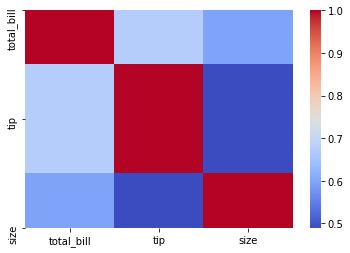

In [10]:
#cmap stands for colormap
sns.heatmap(tips.corr(),cmap='coolwarm')

##### Another useful data we can pass into heatmap is ANNOT which will show the numerical value of column
##### annot argument stands for annotation

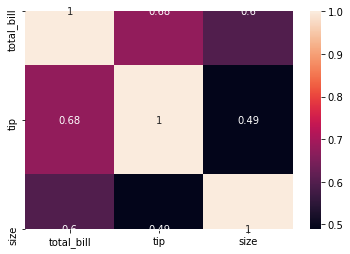

In [11]:

sns.heatmap(tips.corr(),annot=True)

* annot is used to annotate the actual value that belongs to these cells
* cmap is used for the colour mapping you want like coolwarm, plasma, magma etc.
* linewidth is used to set the width of the lines separating the cells.
* linecolor is used to set the colour of the lines separating the cells.

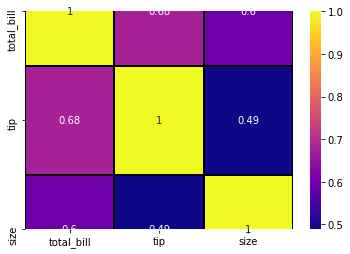

In [12]:
sns.heatmap(tc, annot = True, cmap ='plasma', linecolor ='black', linewidths = 1) 

##### Now we can check flights dataset to understand how to convert a dataset into matrix form using pivot table. 

In [13]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [14]:
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


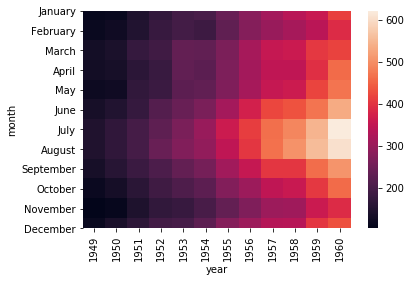

In [15]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

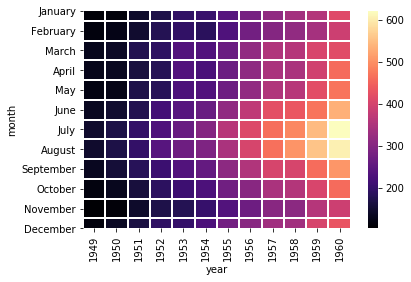

In [16]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

##### Here we will be adding another arugments to the heatmap , the line color will provide space in between values and linewidth shows the width of the color

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

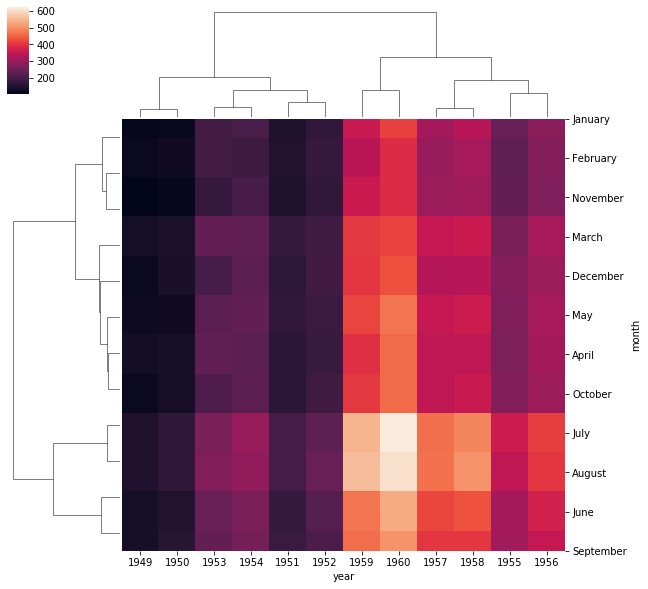

In [17]:
sns.clustermap(pvflights)

##### Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count).
##### Lets check the year 1949,1950 both them are grouped together and looked almost similar then 1950 looks similar with year 1953 rather than 1951

##### That means we can begin to infer things from this plot, 
* That August and July are similar (makes sense, since they are both summer travel months)
* Then Jan,Feb,Nov are similar

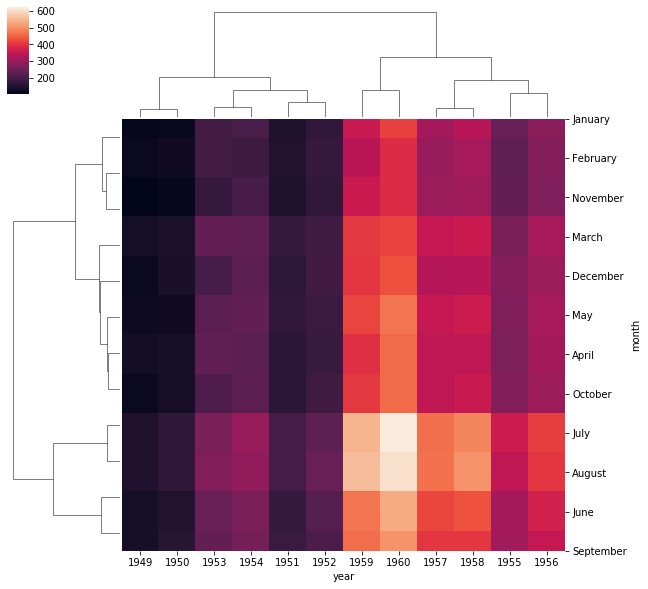

In [18]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights)

In [19]:
sns.clustermap(pvflights,cmap="coolwarm',standard_scale=1)


SyntaxError: EOL while scanning string literal (<ipython-input-19-510f99028a7e>, line 1)

##### sns.cstandard_scale = 1, normalises the data from 0 to 1 range. We can see that the months as well as years are no longer in order as they are clustered according to the similarity**

##### So we can conclude that a heatmap will display things in the order we give whereas the cluster map clusters the data based on similarity.

# Great Job!